# Exercise

You measure the position of a quasar $N$ times with the *same* telescope (homoscedastic errors). Let's say the underlying process is Gaussian, the true position is $\mu=1$ (in suitable units), and the errors are $\sigma=0.2$.

#### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.
- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using `np.argsort`) 
- Compare it with the MLE estimator derived above

#### Part 2

Check the Fisher matrix error estimate makes sense.
- Do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- Divide through by our $\Delta \theta^2$ to get the correct normalization, 
- Multiply by $-1$, 
- Then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

#### Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform

#### Part 1

First of all I generate $N$ points ($fake$) from a normal distribution with mean $\mu=1$ and standard deviation $\sigma=0.2$.

In [2]:
N = 3000
mu = 1
sigma = 0.2
fake = norm(mu, sigma).rvs(N)

Then, I compute the probability associated to each data point in the array $fake$, and the probability (likelihood $L$) of the whole data set. This is done by computing the product of the single probabilities.

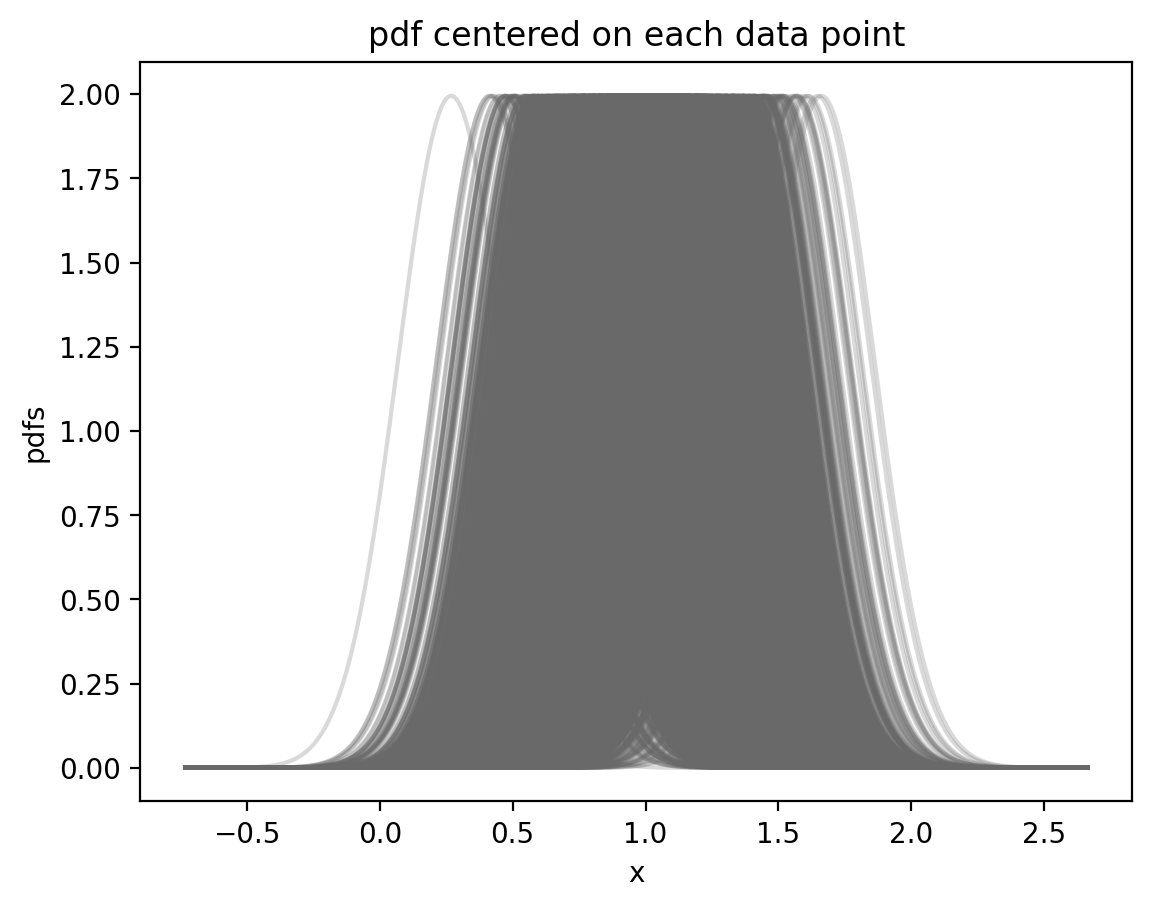

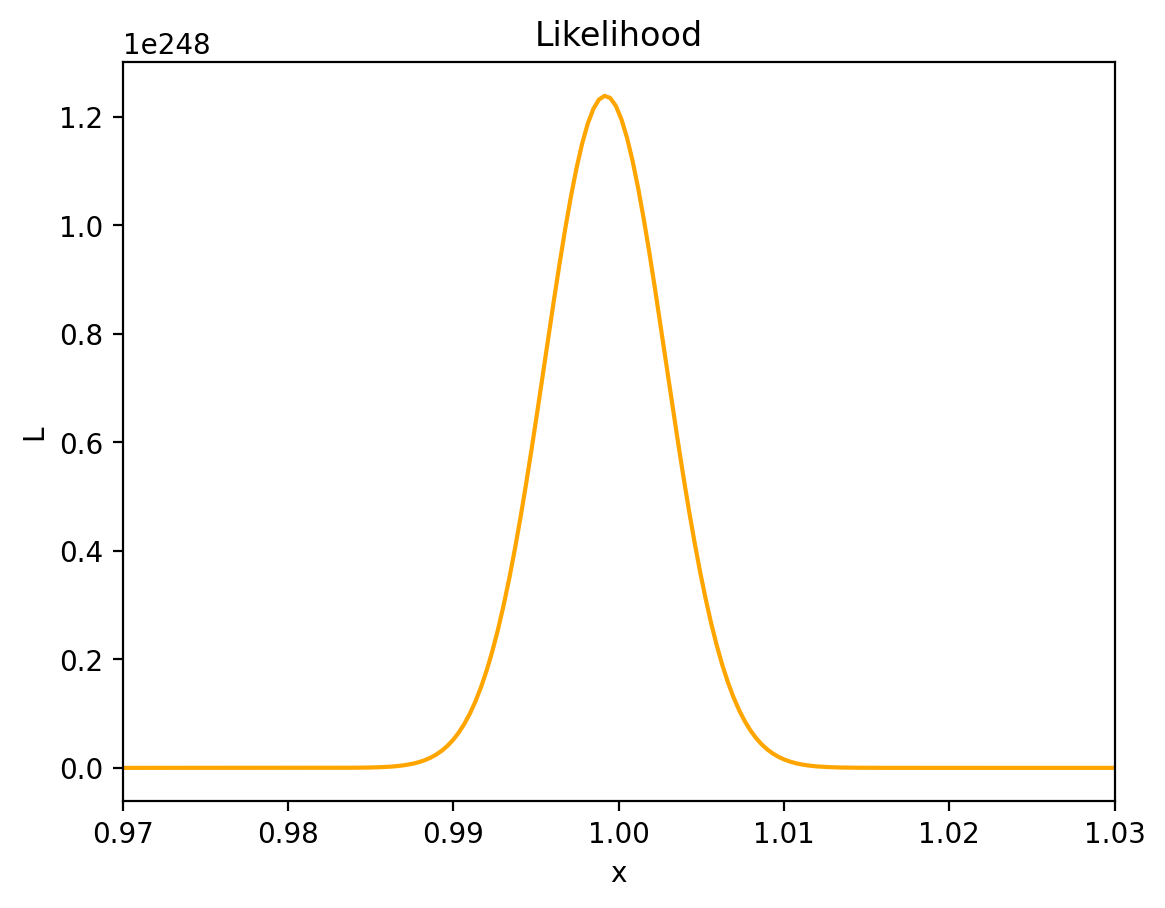

In [3]:
M = 10000
x = np.linspace(min(fake)-1, max(fake)+1, M)
L = np.ones(M)
lnL = np.ones(M)

for i in range(0, N):
    prob = norm(fake[i], sigma).pdf(x)
    L = L*prob
    lnL = lnL+np.log(prob)
    plt.plot(x, prob, color='dimgrey', alpha=0.25)

plt.title('pdf centered on each data point')
plt.xlabel('x')
plt.ylabel('pdfs')
plt.show()

plt.plot(x, L, color='orange')
plt.xlim(0.97, 1.03)
plt.title('Likelihood')
plt.xlabel('x')
plt.ylabel('L')
plt.show()

To compare the maximum likelihood estimator computed from the empirical likelihood with the one computed analytically, I obtain with $indexMaxL=np.argmax(L)$ and $maxL = x[indexMaxL]$ the maximum from the likelihood, and I get the maximum likelihood estimator from its analytical expression: the mean. In fact, for a homoscedastic Gaussian distribution the maximum likelihood estimator of the population mean coincides with the sample mean.

In [4]:
indexMaxL = np.argmax(L)
maxL = x[indexMaxL]

MLE = np.mean(fake)

print(f'Maximum of the likelihood: {maxL:.5f}')
print(f'Maximum likelihood estimator: {MLE:.5f}')

Maximum of the likelihood: 0.99915
Maximum likelihood estimator: 0.99919


#### Part 2

I want now to calculate the error associated to the mean. I can do that by computing the expression of the error as:

\begin{equation}
error1 = (-d^2ln(L)/d\mu^2) ^{-1/2}
\end{equation}

and by comparing it with the error for a homoscedastic Gaussian distribution ($Fisher1$).

In [5]:
diff_lnL1 = np.diff(lnL, 2)  # second derivative of the lnL
error1 = []

deltaMu1 = (max(x)-min(x))/len(x)
error1 = 1/np.sqrt(-diff_lnL1/((deltaMu1)*(deltaMu1)))

Fisher1 = sigma/np.sqrt(N)

print(f'Fisher error: {Fisher1:.7f}')
print(f'Estimate: {error1[indexMaxL]:.7f}')

Fisher error: 0.0036515
Estimate: 0.0036511


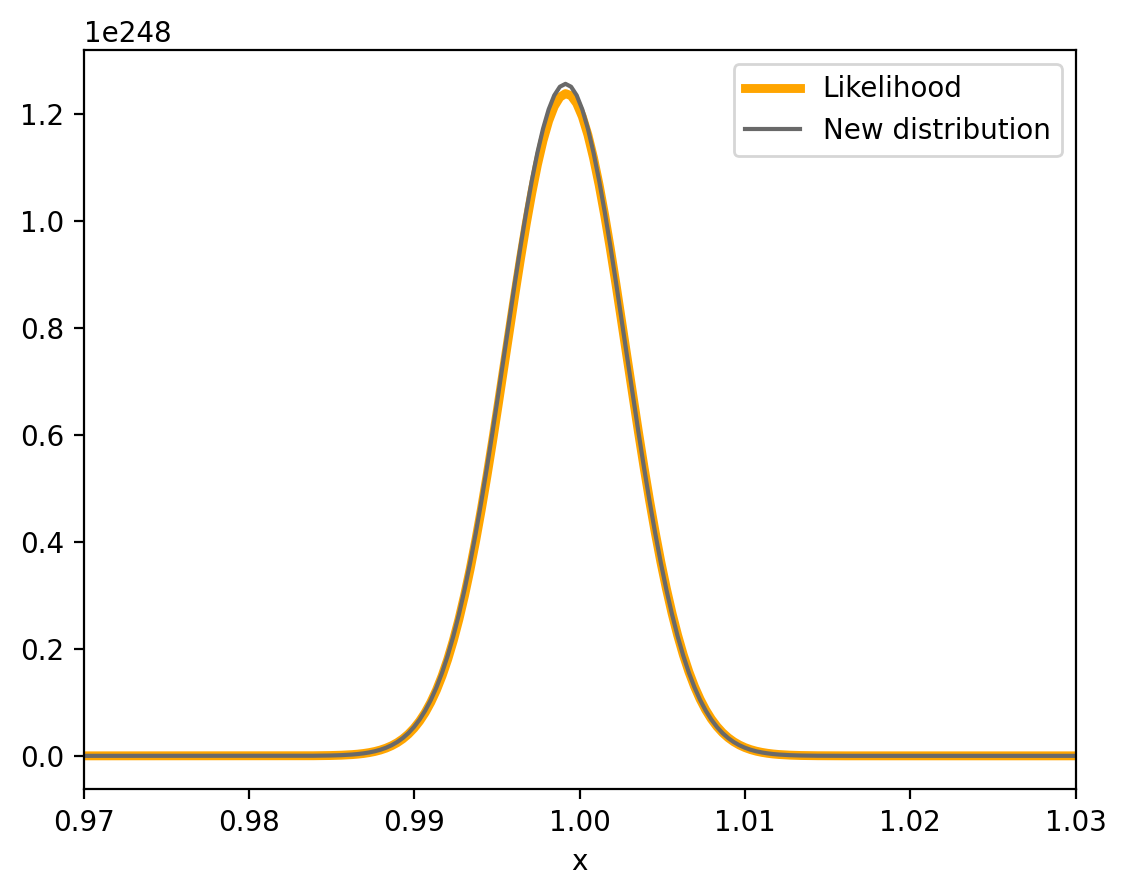

In [11]:
newDist = []
newDist = norm(maxL, error1[indexMaxL]).pdf(x)
nor = 1.15*10**246  # normalization

plt.plot(x, L, color='orange', label='Likelihood', linewidth=3.2)
plt.plot(x, nor*newDist, color='dimgrey', label='New distribution')
plt.xlim(0.97, 1.03)
plt.xlabel('x')
plt.legend()
plt.show()

#### Part 3

I have to consider a heteroscedastic Gaussian distribution. To do that, I generate a Gaussian distribution of $\sigma$ generated with mean $0.2$ and standard deviation $0.05$ (I take the absolute value because standard deviations must be positive).

Then, I associate to each $fake[i]$ the corresponding standard deviation $s[i]$ and I repeat the same procedure as before to compute the likelihood of the whole data set. N.B.: in the "for" cycle I used $prob[prob<1e-300] = 1e-300$ because too small probabilities return infinite values for the logarithm.

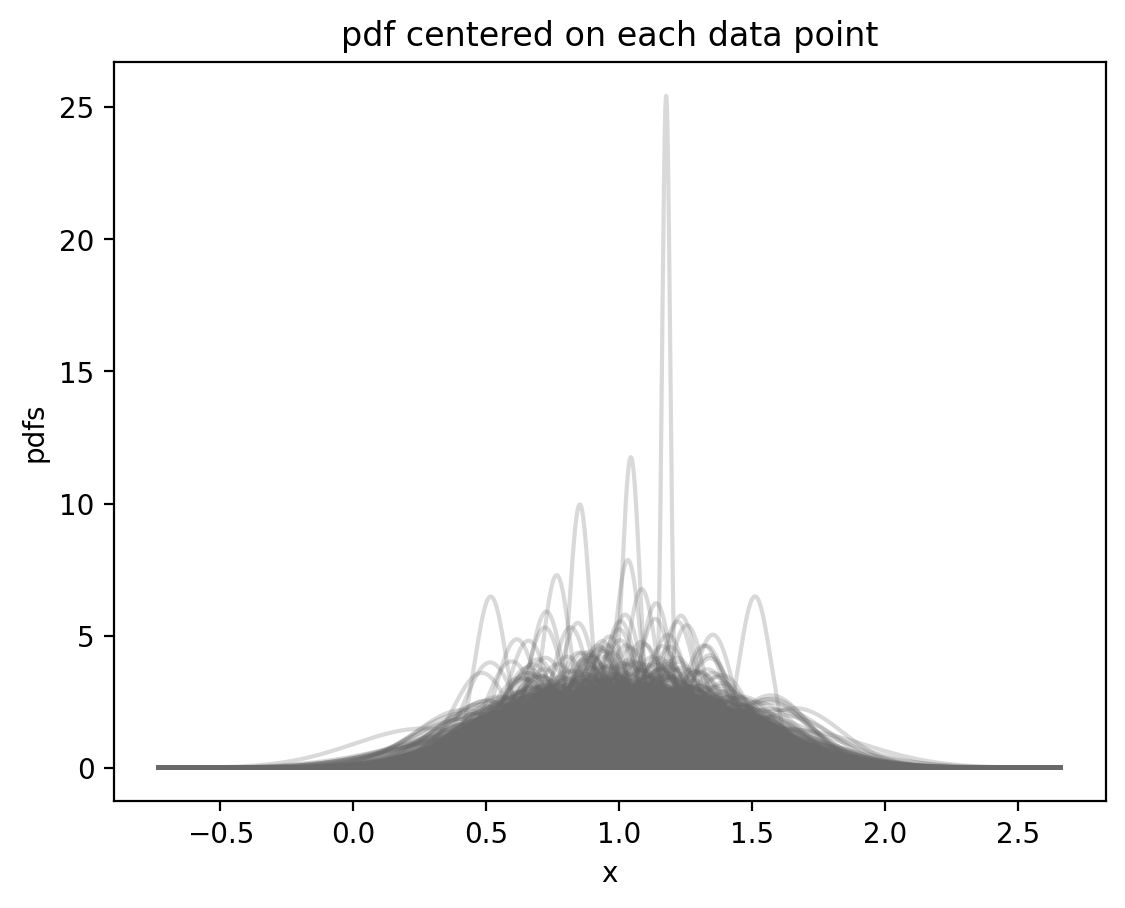

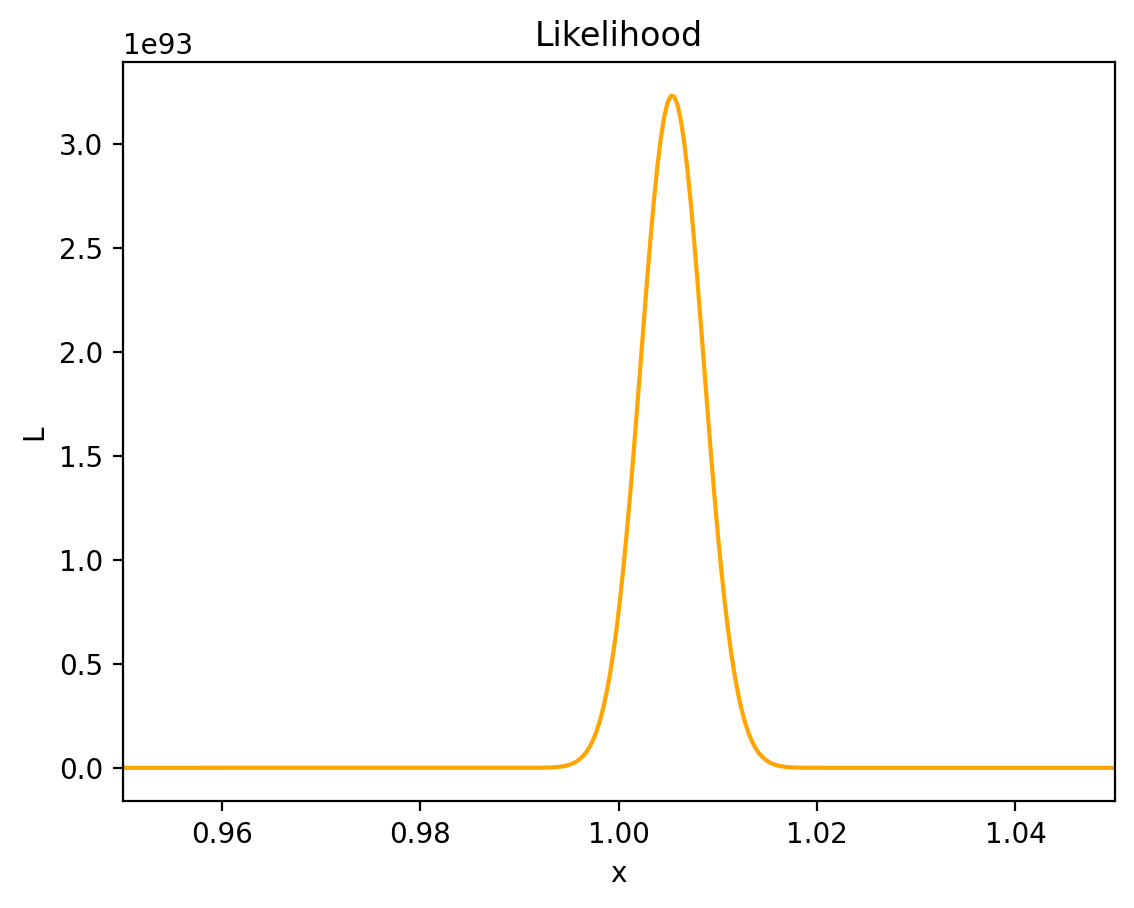

In [12]:
s = np.abs(np.random.normal(sigma, 0.05, N))

L = np.ones(M)
lnL = np.ones(M)

for i in range(0, N):
    prob = norm(fake[i], s[i]).pdf(x)
    prob[prob<1e-300] = 1e-300
    L = L*prob
    lnL = lnL+np.log(prob)
    plt.plot(x, prob, color='dimgrey', alpha=0.25)

plt.title('pdf centered on each data point')
plt.xlabel('x')
plt.ylabel('pdfs')
plt.show()

plt.plot(x, L, color='orange')
plt.xlim(0.95, 1.05)
plt.title('Likelihood')
plt.xlabel('x')
plt.ylabel('L')
plt.show()

For what concerns the analytical estimate of the mean for the Gaussian distribution, in the case of a heteroscedastic Gaussian the expression is changed (it is not the mean anymore).

In [13]:
indexMaxL = np.argmax(L)
maxL = x[indexMaxL]

# MLE for a heteroscedastic gaussian
MLE = np.sum(fake/s**2)/np.sum(1/s**2)

print(f'Maximum of the likelihood: {maxL:.5f}')
print(f'Maximum likelihood estimator: {MLE:.5f}')

Maximum of the likelihood: 1.00525
Maximum likelihood estimator: 1.00540


Also, the estimate for the uncertanty on the MLE is different for a heteroscedastic Gaussian.

In [14]:
diff_lnL2 = np.diff(lnL, 2)
error2 = []
g = 70
deltaMu2 = x[g+1]-x[g]

# error for a heteroscedastic gaussian
Fisher2 = np.sqrt(1/np.sum(1/s**2))

# control: I don't want negative values in np.sqrt() of error2
for i in range(len(diff_lnL2)):
    if diff_lnL2[i]<0: 
        error2.append(1/np.sqrt(-diff_lnL2[i]/(deltaMu2*deltaMu2)))
    else:
        error2.append(error2[i-1])

print(f'Fisher error: {Fisher2:.7f}')
print(f'Estimate: {np.array(error2)[indexMaxL]:.7f}')

Fisher error: 0.0031612
Estimate: 0.0031612


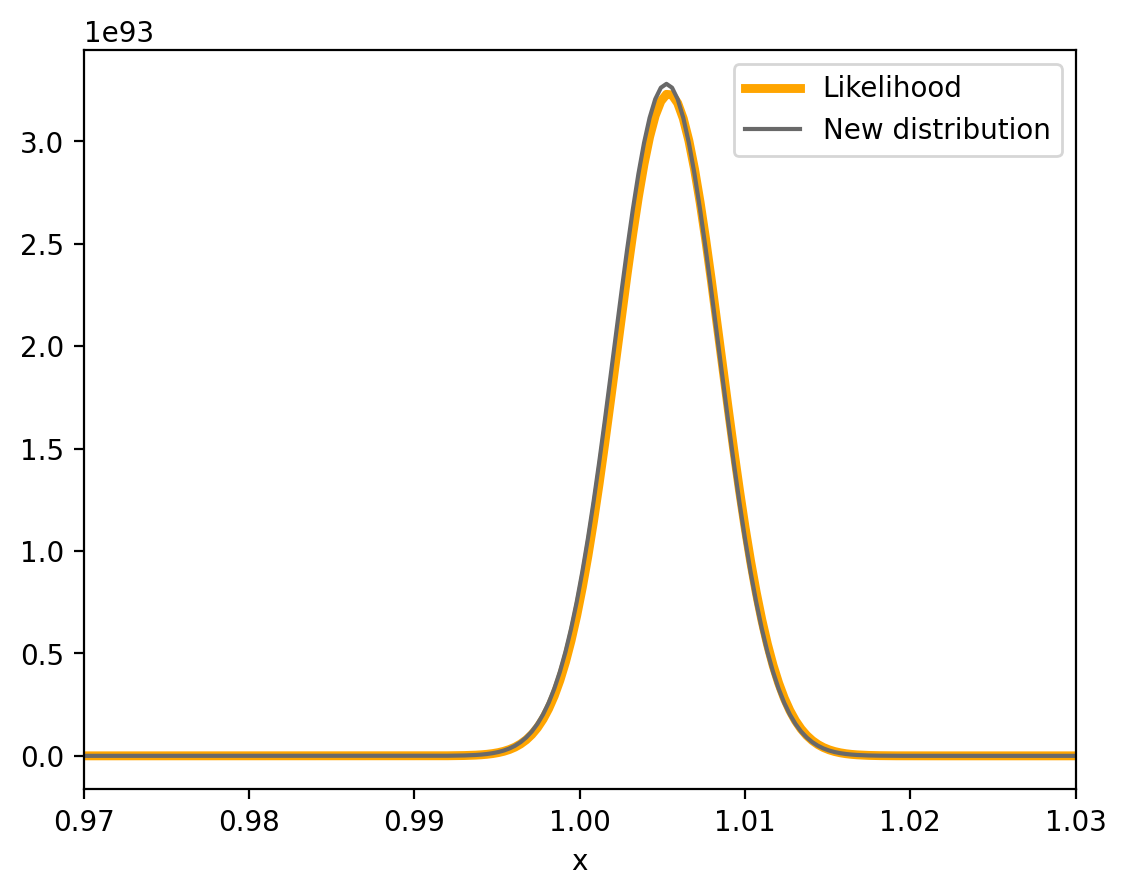

In [23]:
newDist = []
newDist = norm(maxL, error2[indexMaxL]).pdf(x)
nor = 2.6*10**91  # normalization

plt.plot(x, L, color='orange', label='Likelihood', linewidth=3.2)
plt.plot(x, nor*newDist, color='dimgrey', label='New distribution')
plt.xlim(0.97, 1.03)
plt.xlabel('x')
plt.legend()
plt.show()